<a href="https://colab.research.google.com/github/SanthoshMani99/ML/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
from matplotlib import *
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
pip install tensorflow --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Ravdess = r"C:\Users\varsh\Documents\Santhosh\Ravdess\audio_speech_actors_01-24"
# Savee = "E:/MS DS/Sem 2/Machine Learning/Project/Dataset/savee/"
# Crema = "E:/MS DS/Sem 2/Machine Learning/Project/Dataset/Crema/"
# Tess = "E:/MS DS/Sem 2/Machine Learning/Project/Dataset/Toronto/"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Ravdess="/content/drive/MyDrive/Data/Ravdess/audio_speech_actors_01-24/"
Savee = "/content/drive/MyDrive/Data/Savee/ALL/"
Crema = "/content/drive/MyDrive/Data/Crema/AudioWAV/"
Tess = "/content/drive/MyDrive/Data/Toronto/TESS Toronto emotional speech set data/"

# Ravdess

In [6]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0     calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1  neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
2  neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
3     calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
4  neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...

In [7]:
Ravdess_df.tail()

Emotions                                               Path
1435     fear  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1436  disgust  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1437     fear  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1438  disgust  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1439  disgust  /content/drive/MyDrive/Data/Ravdess/audio_spee...

In [8]:
Ravdess_df

Emotions                                               Path
0        calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1     neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
2     neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
3        calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
4     neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
...       ...                                                ...
1435     fear  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1436  disgust  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1437     fear  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1438  disgust  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1439  disgust  /content/drive/MyDrive/Data/Ravdess/audio_spee...

[1440 rows x 2 columns]

# savee

In [9]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                              Path
0    angry  /content/drive/MyDrive/Data/Savee/ALL/DC_a13.wav
1    angry  /content/drive/MyDrive/Data/Savee/ALL/DC_a04.wav
2    angry  /content/drive/MyDrive/Data/Savee/ALL/DC_a01.wav
3    angry  /content/drive/MyDrive/Data/Savee/ALL/DC_a06.wav
4    angry  /content/drive/MyDrive/Data/Savee/ALL/DC_a03.wav

In [10]:
Savee_df

Emotions                                               Path
0       angry   /content/drive/MyDrive/Data/Savee/ALL/DC_a13.wav
1       angry   /content/drive/MyDrive/Data/Savee/ALL/DC_a04.wav
2       angry   /content/drive/MyDrive/Data/Savee/ALL/DC_a01.wav
3       angry   /content/drive/MyDrive/Data/Savee/ALL/DC_a06.wav
4       angry   /content/drive/MyDrive/Data/Savee/ALL/DC_a03.wav
..        ...                                                ...
475  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su14.wav
476  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su09.wav
477  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su03.wav
478  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su04.wav
479  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su06.wav

[480 rows x 2 columns]

# Crema

In [11]:
# crema_directory_list

In [12]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    happy  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
1      sad  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
2      sad  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
3    happy  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
4  neutral  /content/drive/MyDrive/Data/Crema/AudioWAV/108...

In [13]:
Crema_df

Emotions                                               Path
0       happy  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
1         sad  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
2         sad  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
3       happy  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
4     neutral  /content/drive/MyDrive/Data/Crema/AudioWAV/108...
...       ...                                                ...
7437    angry  /content/drive/MyDrive/Data/Crema/AudioWAV/100...
7438     fear  /content/drive/MyDrive/Data/Crema/AudioWAV/100...
7439     fear  /content/drive/MyDrive/Data/Crema/AudioWAV/100...
7440    angry  /content/drive/MyDrive/Data/Crema/AudioWAV/100...
7441     fear  /content/drive/MyDrive/Data/Crema/AudioWAV/100...

[7442 rows x 2 columns]

# Tess

In [14]:
# tess_directory_list

In [15]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
      # print(file)
      part = file.split('.')[0]
      part = part.split('_')[2]
      if part=='ps':
        file_emotion.append('surprise')
      else:
        file_emotion.append(part)
      file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
1    happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
2    happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
3    happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
4    happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...

In [16]:
Tess_df

Emotions                                               Path
0       happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
1       happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
2       happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
3       happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
4       happy  /content/drive/MyDrive/Data/Toronto/TESS Toron...
...       ...                                                ...
2795  disgust  /content/drive/MyDrive/Data/Toronto/TESS Toron...
2796  disgust  /content/drive/MyDrive/Data/Toronto/TESS Toron...
2797  disgust  /content/drive/MyDrive/Data/Toronto/TESS Toron...
2798  disgust  /content/drive/MyDrive/Data/Toronto/TESS Toron...
2799  disgust  /content/drive/MyDrive/Data/Toronto/TESS Toron...

[2800 rows x 2 columns]

In [17]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0,ignore_index=True)
data_path.to_csv("/content/drive/MyDrive/Data/data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0     calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1  neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
2  neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
3     calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
4  neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...

In [18]:
data_path.Path[0]

'/content/drive/MyDrive/Data/Ravdess/audio_speech_actors_01-24/Actor_23/03-01-02-01-01-02-23.wav'

In [19]:
data_path.Emotions.value_counts()

happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: Emotions, dtype: int64

In [20]:
data_path.Path

0        /content/drive/MyDrive/Data/Ravdess/audio_spee...
1        /content/drive/MyDrive/Data/Ravdess/audio_spee...
2        /content/drive/MyDrive/Data/Ravdess/audio_spee...
3        /content/drive/MyDrive/Data/Ravdess/audio_spee...
4        /content/drive/MyDrive/Data/Ravdess/audio_spee...
                               ...                        
12157    /content/drive/MyDrive/Data/Savee/ALL/KL_su14.wav
12158    /content/drive/MyDrive/Data/Savee/ALL/KL_su09.wav
12159    /content/drive/MyDrive/Data/Savee/ALL/KL_su03.wav
12160    /content/drive/MyDrive/Data/Savee/ALL/KL_su04.wav
12161    /content/drive/MyDrive/Data/Savee/ALL/KL_su06.wav
Name: Path, Length: 12162, dtype: object

In [21]:
data_path

Emotions                                               Path
0          calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
1       neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
2       neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
3          calm  /content/drive/MyDrive/Data/Ravdess/audio_spee...
4       neutral  /content/drive/MyDrive/Data/Ravdess/audio_spee...
...         ...                                                ...
12157  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su14.wav
12158  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su09.wav
12159  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su03.wav
12160  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su04.wav
12161  surprise  /content/drive/MyDrive/Data/Savee/ALL/KL_su06.wav

[12162 rows x 2 columns]

# Data Visualisation and Exploration

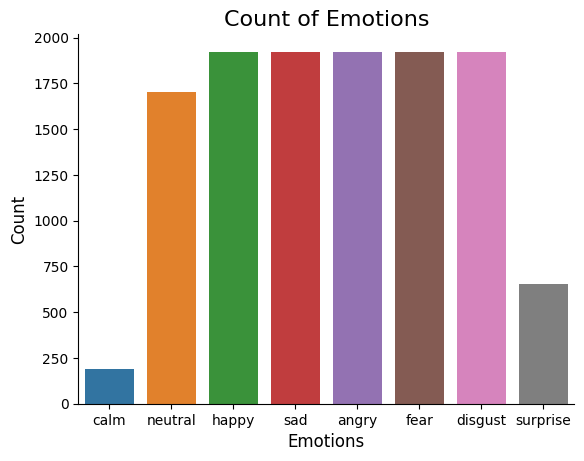

In [22]:
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions',data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# waveplots and spectograms for audio signals

In [23]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

# Fear

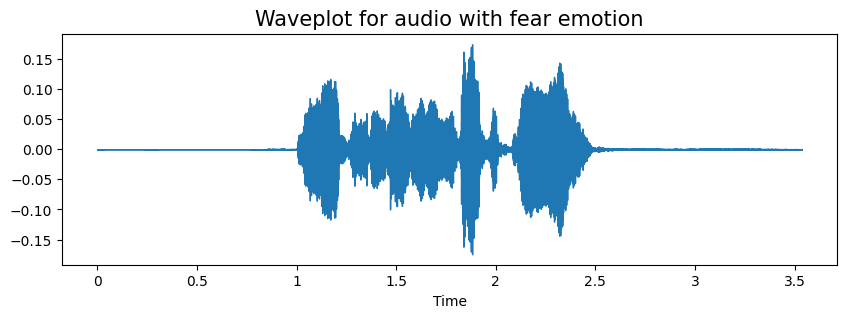

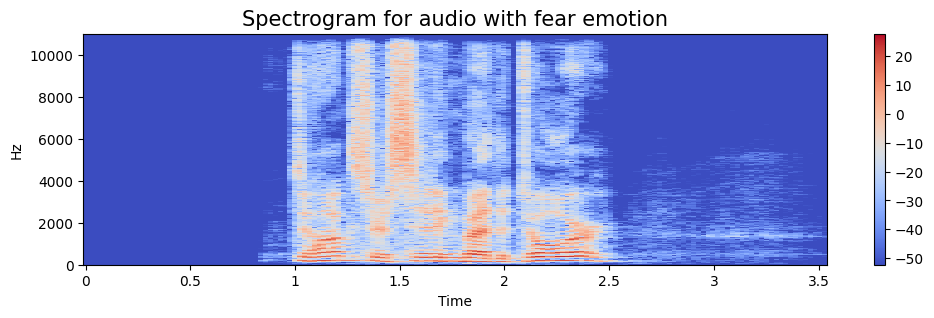

In [24]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

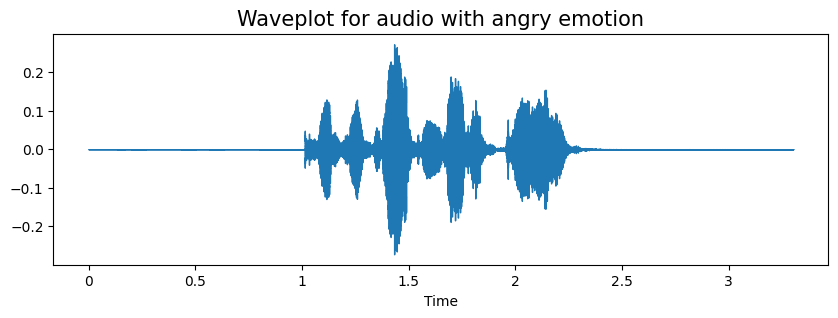

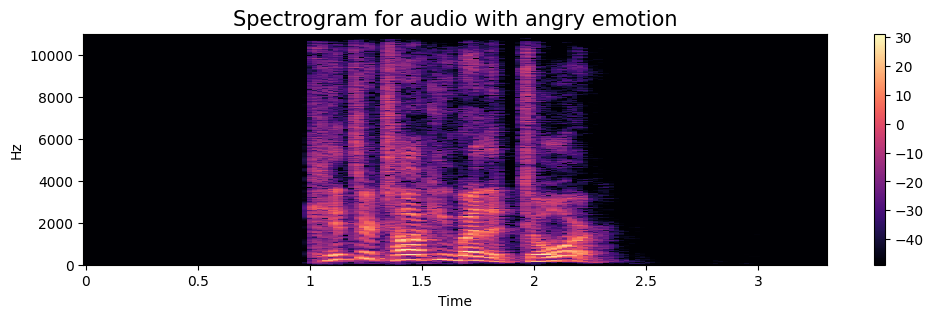

In [25]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

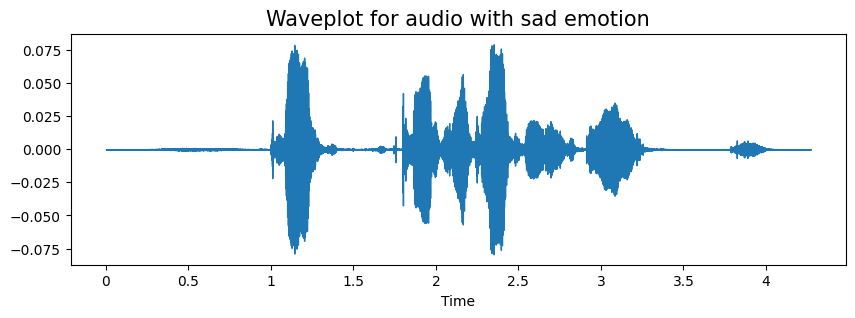

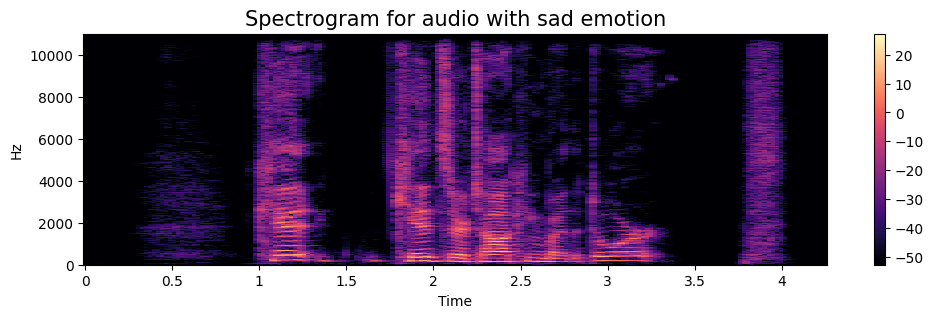

In [26]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

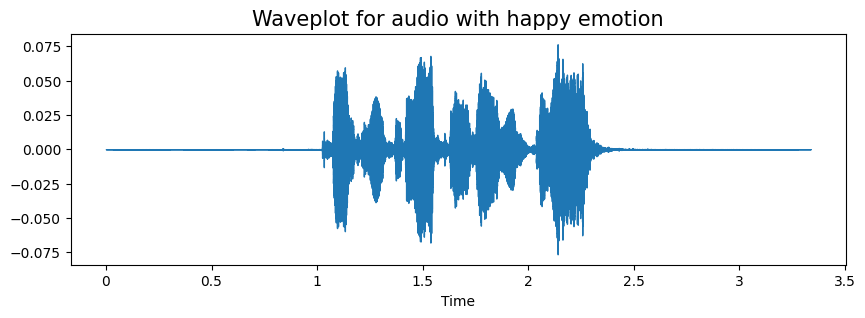

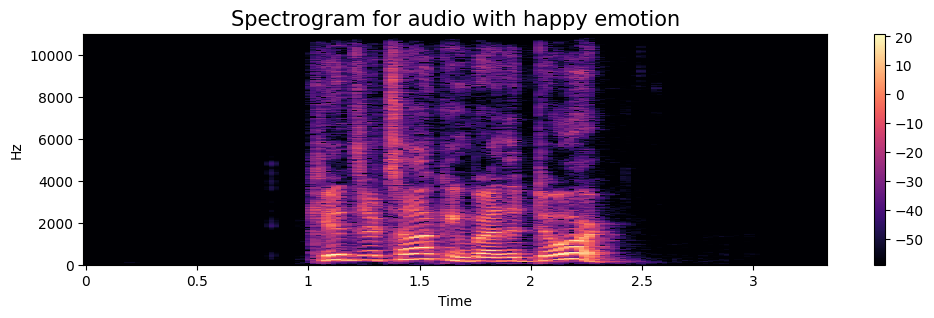

In [27]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data Augmentation

In [28]:
# def noise(data):
#     noise_amp = 0.035*np.random.uniform()*np.amax(data)
#     data = data + noise_amp*np.random.normal(size=data.shape[0])
#     return data

# def stretch(data):
#     return librosa.effects.time_stretch(data,rate=0.8)

# def shift(data):
#     shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
#     return np.roll(data, shift_range)

# def pitch(data, n_steps, sampling_rate):
#     return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

# # taking any example and checking for techniques.
# path = np.array(data_path.Path)[1]
# data, sample_rate = librosa.load(path)

In [29]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):  
  return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data,sampling_rate,pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, n_steps=pitch_factor, sr=sampling_rate)

# def pitch(data, sampling_rate):
#     return librosa.effects.pitch_shift(data,sampling_rate=0.7)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [30]:
# path = np.array(data_path.Path)[1]
# data, sample_rate = librosa.load(path)

# librosa.effects.pitch_shift(data,n_steps=2, sr=sample_rate)

In [31]:
# stretch(data)

1. Simple Audio

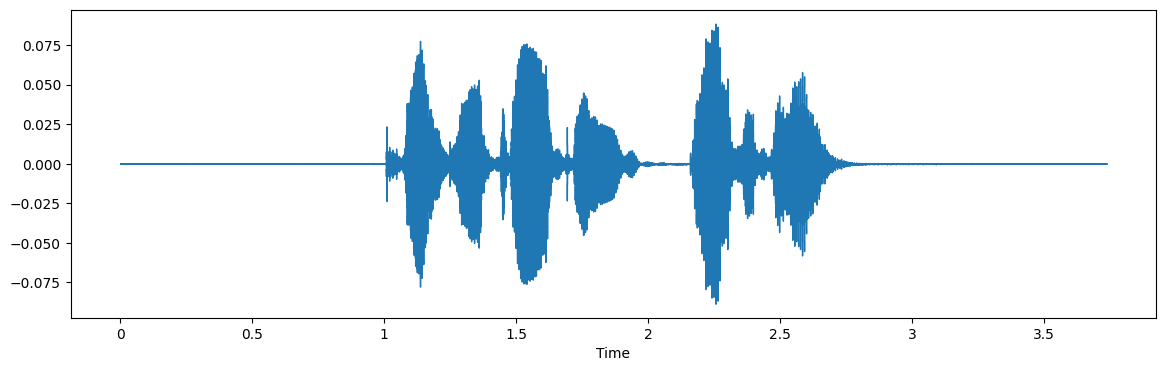

In [32]:
import librosa.display
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise Injection

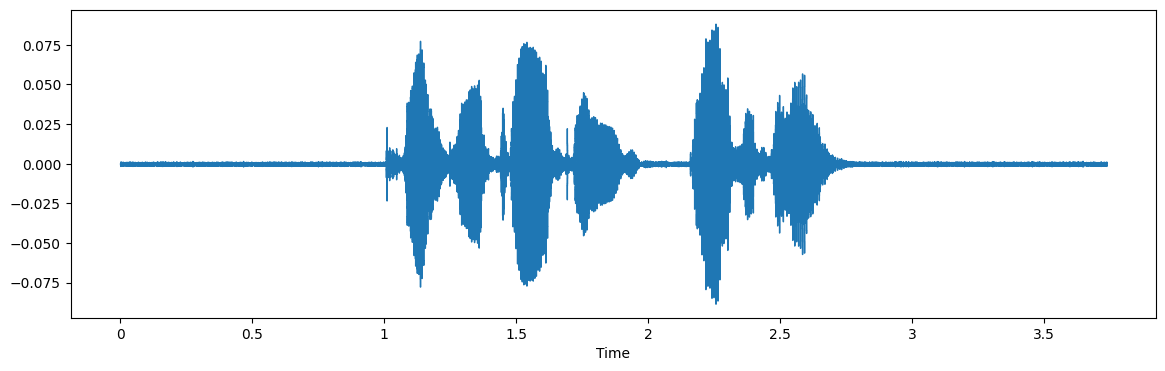

In [33]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


3. Stretching


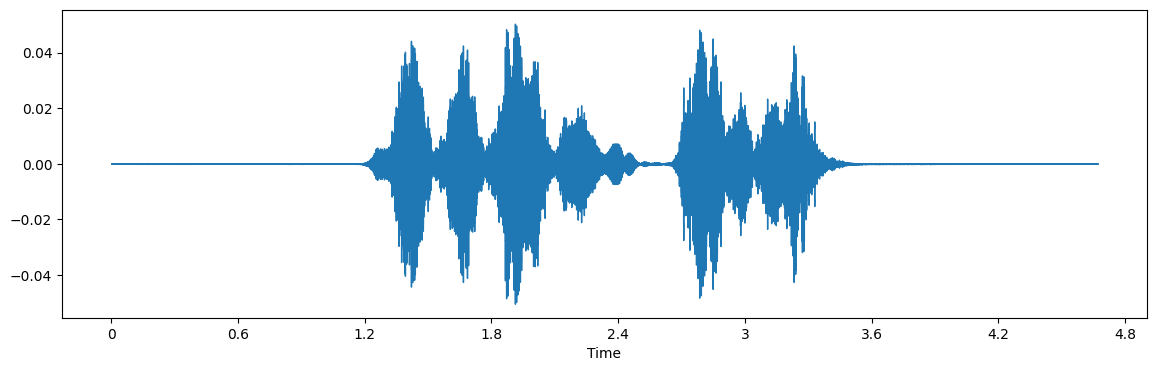

In [34]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

4. Shifting

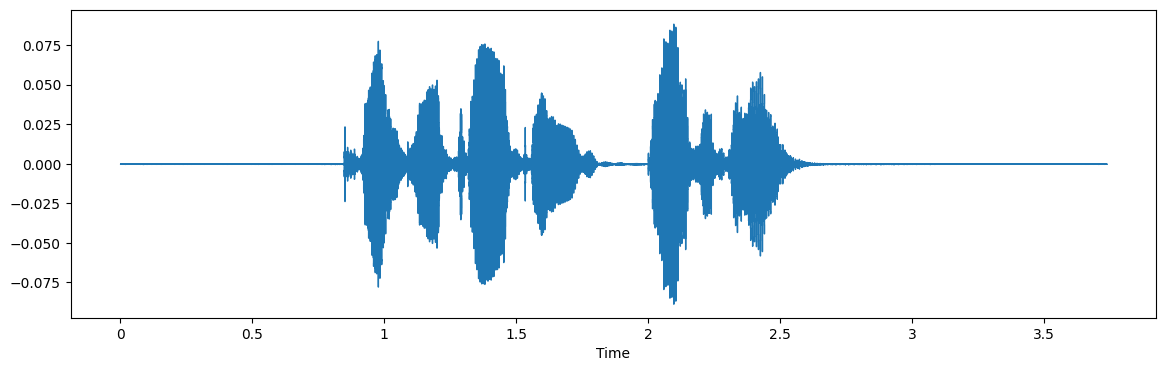

In [35]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

5. Pitch

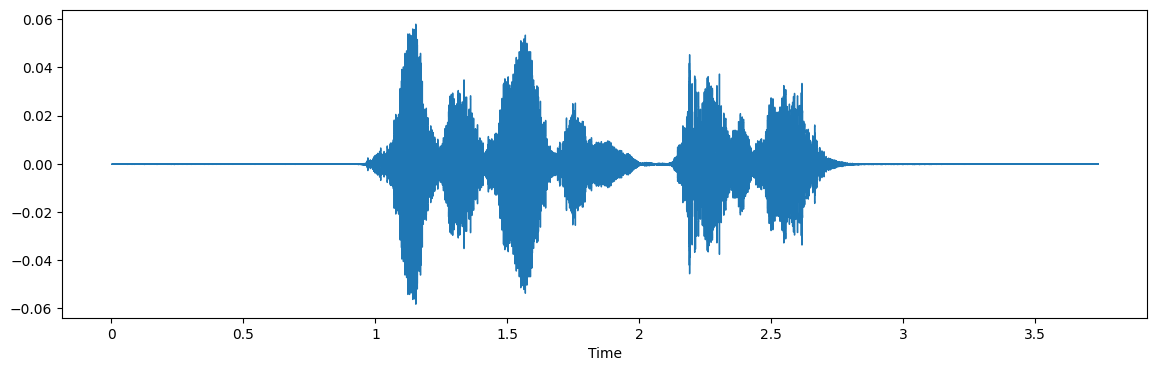

In [36]:
x = pitch(data,sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Feature Extraction

In [37]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sampling_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data,sampling_rate=0.8)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [38]:
# def pitch(data, n_steps, sampling_rate):
#     return librosa.effects.pitch_shift(data, sr=sampling_rate)


In [39]:
# str(data_path.Path[1])

In [40]:
# librosa.ex('trumpet')

In [41]:
# dp=data_path.sample(100)

In [42]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

          

/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [43]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [44]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.214830  0.701068  0.658663  0.650596  0.700747  0.683654  0.699625   
1  0.215838  0.720190  0.683510  0.713469  0.757820  0.748449  0.717340   
2  0.127937  0.659633  0.677172  0.630708  0.651751  0.648681  0.616886   
3  0.164587  0.627148  0.657013  0.674583  0.735250  0.740369  0.653378   
4  0.304773  0.715920  0.759112  0.771747  0.802789  0.824399  0.770413   

          7         8         9  ...       153       154       155       156  \
0  0.647537  0.644692  0.665607  ...  0.000030  0.000043  0.000032  0.000037   
1  0.649082  0.646555  0.671853  ...  0.000031  0.000044  0.000032  0.000037   
2  0.650075  0.600000  0.610899  ...  0.000007  0.000008  0.000007  0.000008   
3  0.582921  0.554685  0.549471  ...  0.000040  0.000070  0.000082  0.000083   
4  0.647779  0.627827  0.631062  ...  0.000635  0.000622  0.000632  0.000607   

        157       158       159       160           161   labels  
0  0.000055  0.000047  0.000039  0.000019  1.835029e-06     calm  
1  0.000055  0.000047  0.000039  0.000020  2.390250e-06     calm  
2  0.000006  0.000010  0.000012  0.000006  5.143718e-07     calm  
3  0.000066  0.000091  0.000087  0.000041  2.074125e-06  neutral  
4  0.000637  0.000679  0.000683  0.000647  5.649827e-04  neutral  

[5 rows x 163 columns]

In [45]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [46]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [47]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [48]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [49]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [50]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [51]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 229s 529ms/step - loss: 1.7011 - accuracy: 0.3130 - val_loss: 1.4600 - val_accuracy: 0.4169 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 233s 546ms/step - loss: 1.4414 - accuracy: 0.4242 - val_loss: 1.3589 - val_accuracy: 0.4730 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 226s 529ms/step - loss: 1.3527 - accuracy: 0.4613 - val_loss: 1.2652 - val_accuracy: 0.4962 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 228s 533ms/step - loss: 1.2981 - accuracy: 0.4791 - val_loss: 1.2181 - val_accuracy: 0.5106 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 225s 525ms/step - loss: 1.2586 - accuracy: 0.4944 - val_loss: 1.2355 - val_accuracy: 0.4935 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 226s 526ms/step - loss: 1.2328 - accuracy: 0.5034 - val_loss: 1.1827 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 7/50
428/428 [==========================

286/286 [==============================] - 18s 63ms/step - loss: 1.1754 - accuracy: 0.6149
Accuracy of our model on test data :  61.48870587348938 %


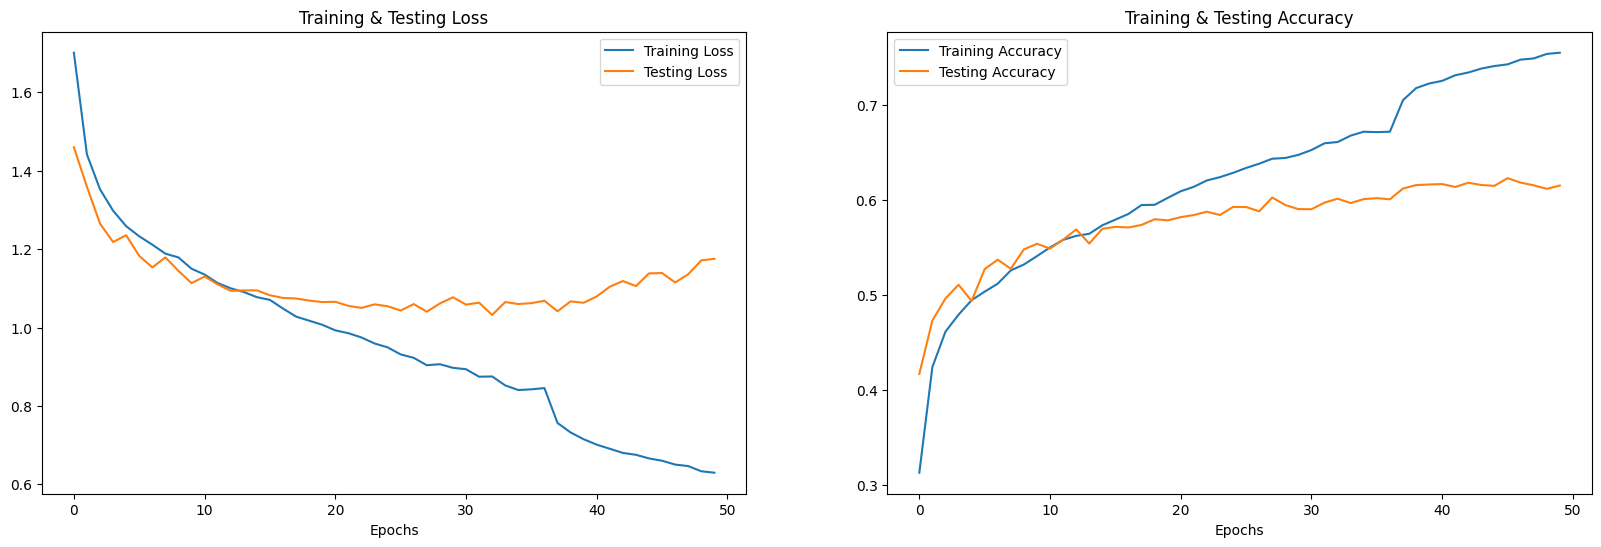

In [52]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [53]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 18s 62ms/step


In [54]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0            angry         angry
1             fear          fear
2            happy         happy
3            happy         angry
4          disgust         angry
5            happy           sad
6            happy         happy
7         surprise      surprise
8            happy          fear
9         surprise      surprise

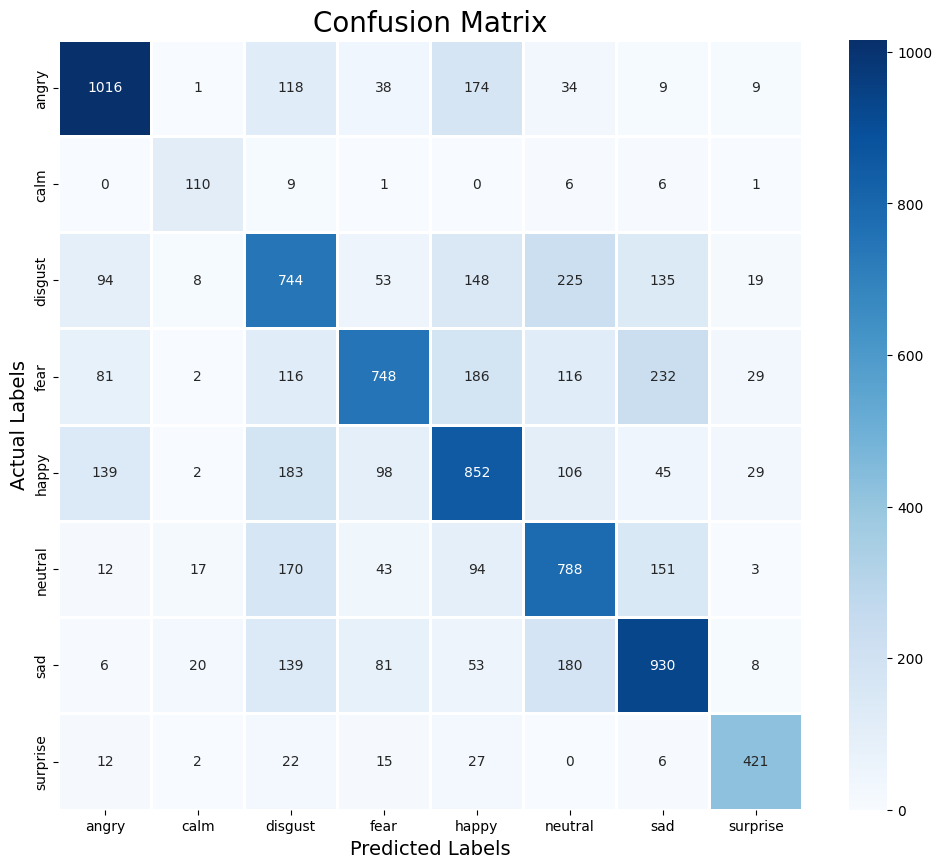

In [55]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.75      0.73      0.74      1399
        calm       0.68      0.83      0.75       133
     disgust       0.50      0.52      0.51      1426
        fear       0.69      0.50      0.58      1510
       happy       0.56      0.59      0.57      1454
     neutral       0.54      0.62      0.58      1278
         sad       0.61      0.66      0.63      1417
    surprise       0.81      0.83      0.82       505

    accuracy                           0.61      9122
   macro avg       0.64      0.66      0.65      9122
weighted avg       0.62      0.61      0.61      9122

